## Importando bibliotecas

# Trabalho Prático 01

## Nome: Jorge Lucas Colares Martins
## Matricula: 402119

In [302]:
import pandas as pd 
import numpy as np 

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
import plotly.graph_objects as go
import plotly.express as px
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


## Importando Dados

In [303]:
df = pd.read_csv("water_potability.csv",delimiter=',')
df.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1040,8.124208,207.509515,26489.114701,8.540837,318.059624,431.625677,10.075598,63.984225,4.724457,0
1978,7.085096,206.676675,21823.094256,5.889945,NaN,387.618111,17.679898,55.023286,3.932839,1
2802,5.230454,152.094169,24790.724599,6.308730,388.998079,307.918075,12.594197,51.625213,3.695615,1
2461,5.866251,146.865680,19679.062670,4.868480,320.012372,414.427017,15.522773,84.403684,4.281313,0
769,5.729303,162.857585,34573.678786,5.654856,415.287072,297.631365,13.990842,76.744677,3.556395,1
64,8.085760,127.739674,32653.910360,6.534237,NaN,416.239630,11.119659,78.275050,4.068689,0
1680,5.400700,197.918993,9968.962738,7.878998,NaN,503.896357,17.408922,77.382841,3.555738,0
2858,NaN,226.318580,18465.265042,6.026304,358.697230,366.926293,10.269402,61.159327,3.406563,1
2400,3.800431,111.246412,14904.940387,7.729645,418.559347,382.224370,15.872221,NaN,4.473976,1
1392,4.916741,191.467110,23425.331316,6.857583,NaN,316.422251,18.281754,43.433240,3.613212,0


## Analise de dados

In [304]:
print("Tipos de dados: \n", df.dtypes,"\n")
print("Número de dados no Dataset: ",df.shape,"\n")
print("Número de NaN no dataset: ",df.isnull().values.sum())


Tipos de dados: 
 ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object 

Número de dados no Dataset:  (3276, 10) 

Número de NaN no dataset:  1434


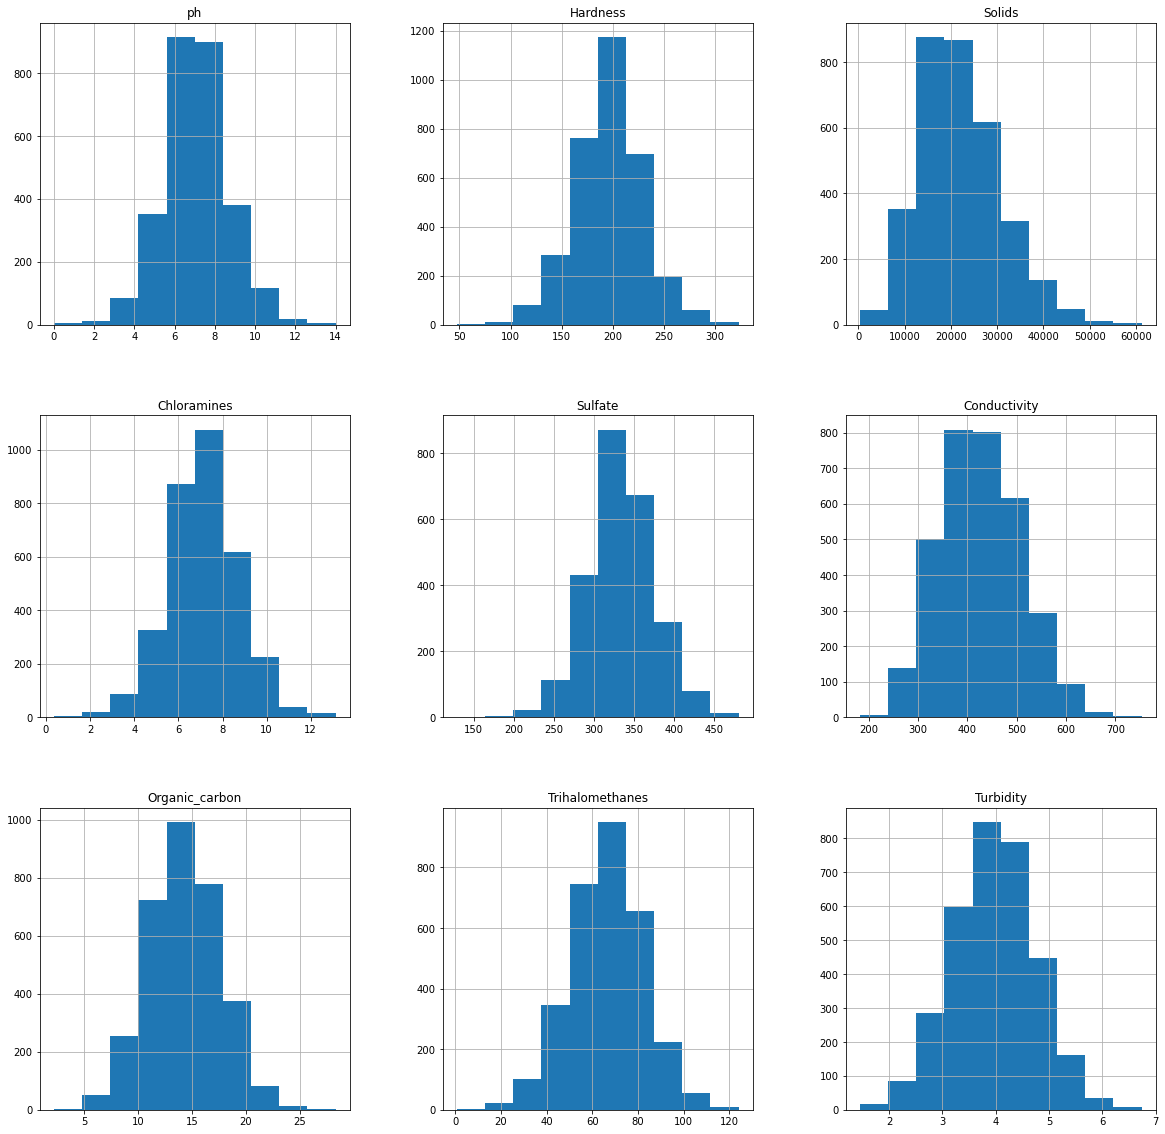

In [305]:
feat = df.drop('Potability',axis=1)
feat.hist(figsize=(20,20));

In [306]:
fig = px.pie(df, names='Potability')
fig.show()

## Pré Processamento

### Retirando os NaN

In [307]:
df.dropna(axis=0, inplace=True)
print("Número de dados no Dataset: ",df.shape,"\n")
print("Número de NaN no dataset: ",df.isnull().values.sum())

df.sample(10)

Número de dados no Dataset:  (2011, 10) 

Número de NaN no dataset:  0


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1066,8.567044,160.217867,23683.110190,4.286930,360.286282,490.512539,9.027167,67.476229,2.804927,0
2694,3.676845,173.677702,22581.224488,12.653362,289.126846,599.729246,8.386407,49.658554,5.461473,0
2777,5.141507,111.994028,11288.634718,5.841750,389.225673,315.229665,12.982476,81.159239,4.510578,1
803,7.804369,216.673869,14160.686766,6.060144,281.355975,468.212537,15.147547,62.860627,4.075557,1
2403,4.865070,174.060457,15222.246444,5.839219,412.037120,333.504327,15.266615,68.926353,3.974972,1
2925,11.563169,174.942862,19359.428816,6.495619,332.446490,366.312672,17.529526,38.431200,5.107236,0
407,8.195765,214.517610,10389.542538,6.295405,327.193898,403.189913,15.067042,72.756812,3.218709,1
1791,6.792125,165.794286,17782.604408,4.970601,307.752703,370.600578,15.138094,96.600542,4.042638,0
102,8.526170,175.612836,11837.123360,7.483709,308.398516,474.240482,21.845916,52.372201,5.083014,0
2123,4.908900,161.243192,13516.911495,8.206212,343.305288,535.224517,14.356101,71.444915,4.196429,0


In [308]:
fig = px.pie(df, names='Potability')
fig.show()

### Divisão treino e teste

In [309]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,random_state= 42, stratify=y)

### Padronização

In [310]:
std_scale = preprocessing.StandardScaler()

X_train_std = std_scale.fit_transform(X_train)
X_test_std = std_scale.transform(X_test)

### Normalização

In [311]:
norm_scale = preprocessing.MinMaxScaler()

X_train_norm = norm_scale.fit_transform(X_train)
X_test_norm = norm_scale.transform(X_test)

## Treino

### Lista de K's

In [312]:
k_range = np.arange(1, 15)
print(k_range)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


### Treino não padronizado

In [ ]:
knn_list = []

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_list.append(knn)


#Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train,y_train)

#DecisionTree
dt = tree.DecisionTreeClassifier(random_state= 42)
dt.fit(X_train,y_train)


#RandomForest
rf = RandomForestClassifier(random_state= 42)
rf.fit(X_train,y_train)


#Ada
ada = AdaBoostClassifier(random_state= 42)
ada.fit(X_train,y_train)

#XGB
xgb = XGBClassifier();
xgb.fit(X_train,y_train);

### Treino Padronizado

In [ ]:
knn_std_list = []
for i in k_range:
    knn_std = KNeighborsClassifier(n_neighbors=i)
    knn_std.fit(X_train_std, y_train)
    knn_std_list.append(knn_std)

#Logistic Regression
lr_std = LogisticRegression(random_state=42)
lr_std.fit(X_train_std,y_train)

#DecisionTree
dt_std = tree.DecisionTreeClassifier(random_state= 42)
dt_std.fit(X_train_std,y_train)


#RandomForest
rf_std = RandomForestClassifier(random_state= 42)
rf_std.fit(X_train_std,y_train)


#Ada
ada_std= AdaBoostClassifier(random_state= 42)
ada_std.fit(X_train_std,y_train)

#XGB
xgb_std= XGBClassifier()
xgb_std.fit(X_train_std,y_train);

### Treino Normalizado

In [ ]:
knn_norm_list = []

for i in k_range:
    knn_norm = KNeighborsClassifier(n_neighbors=i)
    knn_norm.fit(X_train_norm, y_train)
    knn_norm_list.append(knn_norm)


#Logistic Regression
lr_norm = LogisticRegression(random_state=42)
lr_norm.fit(X_train_norm,y_train)

#DecisionTree
dt_norm = tree.DecisionTreeClassifier(random_state= 42)
dt_norm.fit(X_train_norm,y_train)


#RandomForest
rf_norm = RandomForestClassifier(random_state= 42)
rf_norm.fit(X_train_norm,y_train)


#Ada
ada_norm = AdaBoostClassifier(random_state= 42)
ada_norm.fit(X_train_norm,y_train)

#XGB
xgb_norm = XGBClassifier()
xgb_norm.fit(X_train_norm,y_train);

## Resultados

### Função histograma para KNN

In [316]:
def hist_graph_precision_knn(y,title):
    fig = px.bar(df, x=k_range, y=y, color=k_range, title=title, text=y,
        labels=dict(x="K Number", y="Precision", color="K Number")
    )
    fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
    fig.update_layout(xaxis = dict(tickmode = 'linear'))
    fig.show()

### Função histrograma para outros algoritmos

In [317]:
def hist_graph_precision_others(y,title):
    labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGB']
    fig = px.bar(x=labels, y=y, color=labels, title=title, text=y,
        labels=dict(x="Algorithms", y="Precision", color="Algorithm")
    )
    fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
    fig.show()

### Resultado não padronizado

#### Usando KNN para o treino

In [318]:
knn_precision_train_list = []
for i in knn_list:
    y_pred_train = i.predict(X_train)
    knn_precision_train_list.append(metrics.accuracy_score(y_train, y_pred_train))

hist_graph_precision_knn(y=knn_precision_train_list,title="Precisão da predição do treino não padronizado")

#### Usando outros algoritimos para o treino

In [319]:
others_precision_train_list = []

y_pred_train = lr.predict(X_train)
others_precision_train_list.append(metrics.accuracy_score(y_train, y_pred_train))

y_pred_train = dt.predict(X_train)
others_precision_train_list.append(metrics.accuracy_score(y_train, y_pred_train))

y_pred_train = rf.predict(X_train)
others_precision_train_list.append(metrics.accuracy_score(y_train, y_pred_train))

y_pred_train = ada.predict(X_train)
others_precision_train_list.append(metrics.accuracy_score(y_train, y_pred_train))

y_pred_train = xgb.predict(X_train)
others_precision_train_list.append(metrics.accuracy_score(y_train, y_pred_train))


hist_graph_precision_others(y=others_precision_train_list,title='Precisão de outros algoritmos da predição do treino não padronizado')


#### Usando KNN para o teste

In [320]:
knn_precision_test_list = []


for i in knn_list:
    y_pred_test = i.predict(X_test)
    knn_precision_test_list.append(metrics.accuracy_score(y_test, y_pred_test))

hist_graph_precision_knn(y=knn_precision_test_list,title="Precisão da predição do teste não padronizado")

#### Usando outros algoritimos para o teste

In [321]:
others_precision_test_list = []

y_pred_test = lr.predict(X_test)
others_precision_test_list.append(metrics.accuracy_score(y_test, y_pred_test))


y_pred_test = dt.predict(X_test)
others_precision_test_list.append(metrics.accuracy_score(y_test, y_pred_test))

y_pred_test = rf.predict(X_test)
others_precision_test_list.append(metrics.accuracy_score(y_test, y_pred_test))

y_pred_test = ada.predict(X_test)
others_precision_test_list.append(metrics.accuracy_score(y_test, y_pred_test))

y_pred_test = xgb.predict(X_test)
others_precision_test_list.append(metrics.accuracy_score(y_test, y_pred_test))


hist_graph_precision_others(y=others_precision_test_list,title='Precisão de outros algoritmos da predição do teste não padronizado')


### Resultado padronizado

In [322]:

knn_precision_train_std_list = []
for i in knn_std_list:
    y_pred_train_std = i.predict(X_train_std)
    knn_precision_train_std_list.append(metrics.accuracy_score(y_train, y_pred_train_std))

hist_graph_precision_knn(y=knn_precision_train_std_list,title="Precisão da predição do treino padronizado")

In [323]:
others_precision_train_std_list = []

y_pred_train_std = lr_std.predict(X_train_std)
others_precision_train_std_list.append(metrics.accuracy_score(y_train, y_pred_train_std))

y_pred_train_std = dt_std.predict(X_train_std)
others_precision_train_std_list.append(metrics.accuracy_score(y_train, y_pred_train_std))

y_pred_train_std = rf_std.predict(X_train_std)
others_precision_train_std_list.append(metrics.accuracy_score(y_train, y_pred_train_std))

y_pred_train_std = ada_std.predict(X_train_std)
others_precision_train_std_list.append(metrics.accuracy_score(y_train, y_pred_train_std))

y_pred_train_std = xgb_std.predict(X_train_std)
others_precision_train_std_list.append(metrics.accuracy_score(y_train, y_pred_train_std))


hist_graph_precision_others(y=others_precision_train_std_list,title='Precisão de outros algoritmos da predição do treino padronizado')


In [355]:
knn_precision_test_std_list = []

for i in knn_std_list:
    y_pred_test_std = i.predict(X_test_std)
    knn_precision_test_std_list.append(metrics.accuracy_score(y_test, y_pred_test_std))

hist_graph_precision_knn(y=knn_precision_test_std_list,title="Precisão da predição do teste padronizado")

In [325]:
others_precision_test_std_list = []

y_pred_test_std = lr_std.predict(X_test_std)
others_precision_test_std_list.append(metrics.accuracy_score(y_test, y_pred_test_std))

y_pred_test_std = dt_std.predict(X_test_std)
others_precision_test_std_list.append(metrics.accuracy_score(y_test, y_pred_test_std))

y_pred_test_std = rf_std.predict(X_test_std)
others_precision_test_std_list.append(metrics.accuracy_score(y_test, y_pred_test_std))

y_pred_test_std = ada_std.predict(X_test_std)
others_precision_test_std_list.append(metrics.accuracy_score(y_test, y_pred_test_std))

y_pred_test_std = xgb_std.predict(X_test_std)
others_precision_test_std_list.append(metrics.accuracy_score(y_test, y_pred_test_std))


hist_graph_precision_others(y=others_precision_test_std_list,title='Precisão de outros algoritmos da predição do teste padronizado')

### Resultado normalizado

In [326]:
knn_precision_train_norm_list = []

for i in knn_norm_list:
    y_pred_train_norm = i.predict(X_train_norm)
    knn_precision_train_norm_list.append(metrics.accuracy_score(y_train, y_pred_train_norm))

hist_graph_precision_knn(y=knn_precision_train_norm_list,title="Precisão da predição do treino normalizado")

In [327]:

others_precision_train_norm_list = []

y_pred_train_norm = lr_norm.predict(X_train_norm)
others_precision_train_norm_list.append(metrics.accuracy_score(y_train, y_pred_train_norm))

y_pred_train_norm = dt_norm.predict(X_train_norm)
others_precision_train_norm_list.append(metrics.accuracy_score(y_train, y_pred_train_norm))

y_pred_train_norm = rf_norm.predict(X_train_norm)
others_precision_train_norm_list.append(metrics.accuracy_score(y_train, y_pred_train_norm))

y_pred_train_norm = ada_norm.predict(X_train_norm)
others_precision_train_norm_list.append(metrics.accuracy_score(y_train, y_pred_train_norm))

y_pred_train_norm = xgb_norm.predict(X_train_norm)
others_precision_train_norm_list.append(metrics.accuracy_score(y_train, y_pred_train_norm))

hist_graph_precision_others(y=others_precision_train_norm_list,title='Precisão de outros algoritmos da predição do treino normalizado')


In [328]:
knn_precision_test_norm_list = []

for i in knn_norm_list:
    y_pred_test_norm = i.predict(X_test_norm)
    knn_precision_test_norm_list.append(metrics.accuracy_score(y_test, y_pred_test_norm))

hist_graph_precision_knn(y=knn_precision_test_norm_list,title="Precisão da predição do teste normalizado")

In [329]:
others_precision_test_norm_list = []

y_pred_test_norm = lr_norm.predict(X_test_norm)
others_precision_test_norm_list.append(metrics.accuracy_score(y_test, y_pred_test_norm))

y_pred_test_norm = dt_norm.predict(X_test_norm)
others_precision_test_norm_list.append(metrics.accuracy_score(y_test, y_pred_test_norm))

y_pred_test_norm = rf_norm.predict(X_test_norm)
others_precision_test_norm_list.append(metrics.accuracy_score(y_test, y_pred_test_norm))

y_pred_test_norm = ada_norm.predict(X_test_norm)
others_precision_test_norm_list.append(metrics.accuracy_score(y_test, y_pred_test_norm))

y_pred_test_norm = xgb_norm.predict(X_test_norm)
others_precision_test_norm_list.append(metrics.accuracy_score(y_test, y_pred_test_norm))

hist_graph_precision_others(y=others_precision_test_norm_list,title='Precisão de outros algoritmos da predição do teste normalizado')

### Melhorando hyperparemetros

In [330]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [331]:
std_scale = StandardScaler()
features= X.columns
X[features] = std_scale.fit_transform(X[features])

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,random_state= 42, stratify=y)

In [333]:
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False, random_state=42)


para_knn = {'n_neighbors':np.arange(1, 50)}
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5)

para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) 


params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)


params_ada = {'n_estimators': [50,100,250,400,500,600], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)


In [334]:
grid_knn.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_ada.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

Best parameters for KNN: {'n_neighbors': 25}
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 200}
Best parameters for AdaBoost: {'learning_rate': 0.2, 'n_estimators': 50}
Best parameters for XGBoost: {'n_estimators': 600, 'learning_rate': 0.2}


In [345]:
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=1, random_state=42)
knn = KNeighborsClassifier(n_neighbors=25)
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, random_state=42)
ada = AdaBoostClassifier(n_estimators= 50, learning_rate= 0.2, random_state=42 )
xgb = XGBClassifier(n_estimators= 250, learning_rate= 0.8, random_state=42)


In [346]:
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
              ('XGB Classifier', xgb)]

In [ ]:
from sklearn.metrics import accuracy_score

result_list = []

for classifier_name, classifier in classifiers:
 
    classifier.fit(X_train, y_train)    
   

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    result_list.append(accuracy);

In [348]:
print('Logistic Regression: ')
y_pred_lr= lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

Logistic Regression: 
              precision    recall  f1-score   support

           0       0.60      0.99      0.74       300
           1       0.33      0.00      0.01       203

    accuracy                           0.59       503
   macro avg       0.46      0.50      0.38       503
weighted avg       0.49      0.59      0.45       503



In [349]:
print('K Nearest Neighbours :')
y_pred_knn= knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

K Nearest Neighbours :
              precision    recall  f1-score   support

           0       0.64      0.90      0.75       300
           1       0.64      0.26      0.37       203

    accuracy                           0.64       503
   macro avg       0.64      0.58      0.56       503
weighted avg       0.64      0.64      0.60       503



In [350]:
print('Decision Tree: ')
y_pred_dt= dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

Decision Tree: 
              precision    recall  f1-score   support

           0       0.68      0.90      0.77       300
           1       0.72      0.37      0.49       203

    accuracy                           0.69       503
   macro avg       0.70      0.64      0.63       503
weighted avg       0.69      0.69      0.66       503



In [351]:
print('Random Forest :')
y_pred_rf= rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

Random Forest :
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       300
           1       0.68      0.39      0.50       203

    accuracy                           0.68       503
   macro avg       0.68      0.63      0.63       503
weighted avg       0.68      0.68      0.66       503



In [352]:
print('AdaBoost: ')
y_pred_ada= ada.predict(X_test)
print(classification_report(y_test, y_pred_ada))

AdaBoost: 
              precision    recall  f1-score   support

           0       0.61      0.96      0.75       300
           1       0.65      0.11      0.19       203

    accuracy                           0.62       503
   macro avg       0.63      0.53      0.47       503
weighted avg       0.63      0.62      0.52       503



In [353]:
print('XGB: ')
y_pred_xgb=xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

XGB: 
              precision    recall  f1-score   support

           0       0.66      0.73      0.70       300
           1       0.53      0.45      0.49       203

    accuracy                           0.62       503
   macro avg       0.60      0.59      0.59       503
weighted avg       0.61      0.62      0.61       503



In [354]:
label = ['Logistic Regression', 'K Nearest Neighbours', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGB']

fig = px.bar(df, x=label, y=result_list, color=label, title="Melhores resultados com dataset padronizado para cada algoritimo", text=result_list,
    labels=dict(x="Algorithms", y="Precision", color="Algorithms")
)
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.show()